In [177]:
#import necessary Libraries
import json
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import math

In [214]:
# load the extracted data from the music datasets
def load_data(dataset_path):
    with open (dataset_path,'r') as file:
        data=json.load(file)
    
    inputs=np.array(data['mfcc'])                 #converting mfcc values and labels into array
    target_labels=np.array(data['labels'])
    class_mapping=data['mapping']
    return inputs,target_labels,class_mapping
        

In [215]:
inputs,labels,mapping=load_data("data.json")          #Load inputs and labels

In [5]:
#split the dataset into train and test sets
X_train,X_test,y_train,y_test=train_test_split(inputs,labels,test_size=0.2)

In [140]:
X_test

array([[[-1.64608479e+01,  5.29202347e+01,  1.37952127e+01, ...,
         -7.53703880e+00,  1.06021414e+01,  1.66112900e+01],
        [-2.50074883e+01,  4.81244583e+01,  1.13714523e+01, ...,
         -1.03518734e+01,  6.24276447e+00,  1.73072395e+01],
        [-4.96519699e+01,  3.54947739e+01,  1.22029638e+01, ...,
         -1.28190556e+01,  7.29004192e+00,  2.08317642e+01],
        ...,
        [-2.02710709e+02,  4.48460655e+01,  1.77671394e+01, ...,
         -3.57458115e+00, -8.38284874e+00, -2.46826077e+00],
        [-8.04220657e+01,  2.42529831e+01,  5.73265266e+01, ...,
         -2.29230618e+00,  1.62057829e+00,  6.61337948e+00],
        [-3.24897346e+01,  2.32419624e+01,  5.93808479e+01, ...,
         -4.53828931e-01,  4.39680767e+00,  7.93780756e+00]],

       [[-2.20073586e+01,  1.02932281e+02,  7.89939165e+00, ...,
         -8.75319099e+00,  1.64044380e+01,  9.17416763e+00],
        [-2.74060688e+01,  1.08940460e+02,  8.35585499e+00, ...,
         -1.12281361e+01,  1.52413254e

In [80]:
#Neural Network Architecture

model=keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    
    # 1 hidden layer
    keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(rate=0.2),

    
    #2 hidden layer
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(rate=0.2),



    
    # 3 hidden layer
    keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(rate=0.2),

   

    
    #output layer
    keras.layers.Dense(len(np.unique(labels)),activation='softmax')   #output node ----no of unique labels
    
])

#Compile Network
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 512)               865792    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)              

In [81]:
#train network 
mod=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Train on 7988 samples, validate on 1998 samples
Epoch 1/100
7988/7988 [==============================] - 3s 313us/sample - loss: 16.9974 - accuracy: 0.1800 - val_loss: 3.4660 - val_accuracy: 0.1647
Epoch 2/100
7988/7988 [==============================] - 2s 231us/sample - loss: 4.5819 - accuracy: 0.1496 - val_loss: 3.4767 - val_accuracy: 0.1291
Epoch 3/100
7988/7988 [==============================] - 2s 232us/sample - loss: 3.7525 - accuracy: 0.1362 - val_loss: 3.4524 - val_accuracy: 0.1391
Epoch 4/100
7988/7988 [==============================] - 2s 232us/sample - loss: 3.6164 - accuracy: 0.1470 - val_loss: 3.4374 - val_accuracy: 0.1486
Epoch 5/100
7988/7988 [==============================] - 2s 237us/sample - loss: 3.5146 - accuracy: 0.1693 - val_loss: 3.4192 - val_accuracy: 0.1507
Epoch 6/100
7988/7988 [==============================] - 2s 250us/sample - loss: 3.4455 - accuracy: 0.1890 - val_loss: 3.3451 - val_accuracy: 0.1957
Epoch 7/100
7988/7988 [==============================] - 

In [82]:
def plot_history(mod):
    fig,axs=plt.subplots(2)
    
    #accuracy subplot
    axs[0].plot(mod.history['accuracy'],label="train")
    axs[0].plot(mod.history['val_accuracy'],label="test")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_xlabel("Epochs")
    axs[0].legend(loc="upper left")
    axs[0].set_title("Model Accuracy")
    
    #loss Subplot
    axs[1].plot(mod.history['loss'],label="train")
    axs[1].plot(mod.history['val_loss'],label="test")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].legend(loc="upper left")
    axs[1].set_title("Model Loss")
    
    plt.show()
    

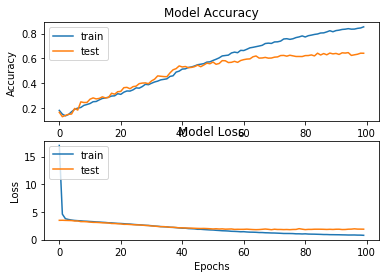

In [83]:
plot_history(mod)

In [283]:
#save model
model_name="model.h5"
save_dir=os.path.join(os.getcwd(),'Models')

#save models and weight
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path=os.path.join(save_dir,model_name)
model.save(model_path)
print("Saved Trained Model at %s" % model_path)

Saved Trained Model at C:\Users\admin\Cloudyfox\AudioProject\Models\model.h5


In [284]:
#save Model json
model_json=model.to_json()
with open("model.json",'w') as json_file:
    json_file.write(model_json)

In [285]:
# loading json and creating model
from tensorflow.keras.models import model_from_json
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

#load weight into new model
loaded_model.load_weights(model_path)
print("Loaded Model from the Disk")

Loaded Model from the Disk


In [290]:
#evaluate loaded model on the test data 
loaded_model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
score=loaded_model.evaluate(X_test,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

accuracy: 64.11%


In [331]:
# Prediction
def predict_audio(num_mfcc=13, n_fft=2048, hop_length=512,num_segments=10):
    data={
        
        "mfcc":[]
    }
    test_file_path="whatawonderful.wav"
#     duration=librosa.get_duration(filename=test_file_path)
    signal,sample_rate=librosa.load(test_file_path)
    duration=30
    sample_per_track = sample_rate * duration
    samples_per_segment = int(sample_per_track/ num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    

    for d in range(0,num_segments):
        start = samples_per_segment * d
        finish = start + samples_per_segment
        test_mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        test_mfcc=test_mfcc.T
        if len(test_mfcc) == num_mfcc_vectors_per_segment:

            data["mfcc"].append(test_mfcc.tolist())
            
    return data

            

In [334]:
#get output of the test music diffrent from datasets from the model
test_mfcc=predict_audio()
test_input=test_mfcc['mfcc']
test_input=np.array(test_input)
a=[]
predictions=[]
output_labels=[]
for i in range(0,10):
    a.append(test_input[2].reshape(1,130,13))
for test_item in a:
    livepred=loaded_model.predict(test_item,batch_size=32,verbose=1)
    predictions.append(livepred)
for item in predictions:
    output_labels.append(mapping[item.argmax(axis=1).item()])
print(output_labels)
output=max(set(output_labels), key = output_labels.count) 

1/1 [==============================] - 0s 3ms/sample
['country', 'country', 'country', 'country', 'country', 'country', 'country', 'country', 'country', 'country']


In [333]:
print(output)

country
